In [1]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from xmitgcm import open_mdsdataset
from scipy.interpolate import PchipInterpolator as pchip
from xgcm.grid import Grid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [3]:
ys, dy = (20,20)
dt = 3e2
ts = int(360*86400*ys/dt+288)
te = int(360*86400*(ys+dy)/dt+288)
print(ts,te)
ds = open_mdsdataset(op.join(ddir,'deepML-2mon_5kmTtave'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts-288+8640,te,8640),
                     prefix=['Ttave'], delta_t=dt
                    )
ds

2073888 4147488


/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 240)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC,

In [54]:
ds.Z

<xarray.DataArray 'Z' (Z: 76)>
array([-5.000000e-01, -1.570000e+00, -2.790000e+00, -4.185000e+00,
       -5.780000e+00, -7.595000e+00, -9.660000e+00, -1.201000e+01,
       -1.468000e+01, -1.770500e+01, -2.112500e+01, -2.499000e+01,
       -2.934500e+01, -3.424000e+01, -3.972500e+01, -4.585500e+01,
       -5.269000e+01, -6.028000e+01, -6.868500e+01, -7.796500e+01,
       -8.817500e+01, -9.937000e+01, -1.116000e+02, -1.249150e+02,
       -1.393650e+02, -1.549900e+02, -1.718250e+02, -1.899000e+02,
       -2.092350e+02, -2.298550e+02, -2.517700e+02, -2.749850e+02,
       -2.995050e+02, -3.253200e+02, -3.524200e+02, -3.807900e+02,
       -4.104100e+02, -4.412550e+02, -4.733050e+02, -5.065400e+02,
       -5.409350e+02, -5.764650e+02, -6.131100e+02, -6.508550e+02,
       -6.896850e+02, -7.295950e+02, -7.705850e+02, -8.126600e+02,
       -8.558350e+02, -9.001350e+02, -9.455950e+02, -9.922600e+02,
       -1.040180e+03, -1.089425e+03, -1.140080e+03, -1.192235e+03,
       -1.246005e+03, -1.301520

In [4]:
grid = Grid(ds, periodic=['X'])

In [5]:
months = np.tile(range(12),dy)
temp = ds.Ttave
temp.coords['months'] = ('time',months)
temp_mon = temp.groupby('months').mean(['time','XC'])
temp_mon

<xarray.DataArray 'Ttave' (months: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(1, 76, 400)>
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
  * months   (months) int64 0 1 2 3 4 5 6 7 8 9 10 11

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


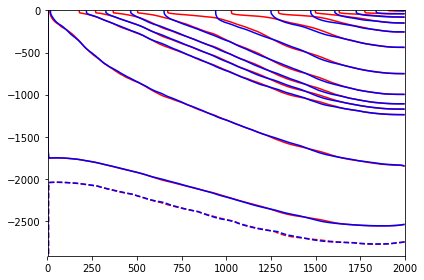

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
fig.set_tight_layout(True)
ax.contour(temp_mon.YC*1e-3, temp_mon.Z, temp_mon[1], 
           colors='r', levels=np.linspace(-1,8,16))
ax.contour(temp_mon.YC*1e-3, temp_mon.Z, temp_mon[4], 
           colors='b', levels=np.linspace(-1,8,16))

# Isopycnal slope
$$s_\rho = -\frac{\overline{b}_y}{\overline{b}_z} = -\frac{\overline{\theta}_y}{\overline{\theta}_z}$$

In [14]:
ty = grid.interp(grid.diff(temp_mon,'Y',boundary='fill')/grid.diff(temp_mon.YC,'Y',boundary='fill'),
                'Y',boundary='fill')
tz = grid.interp(grid.diff(temp_mon,'Z',boundary='fill')/grid.diff(temp_mon.Z,'Z',boundary='fill'),
                'Z',boundary='fill')
srho = -ty/tz
srho

<xarray.DataArray (months: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(1, 1, 1)>
Coordinates:
  * months   (months) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


<a list of 12 text.Text objects>

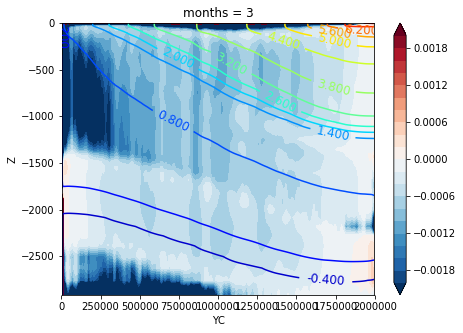

In [58]:
fig, ax = plt.subplots(figsize=(7,5))
srho[3].plot.contourf(ax=ax,levels=np.linspace(-2e-3,2e-3,21))
cs = temp_mon[3].plot.contour(ax=ax,levels=np.linspace(-1,8,16), cmap='jet')
plt.clabel(cs, inline=1, fontsize=12)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


<a list of 11 text.Text objects>

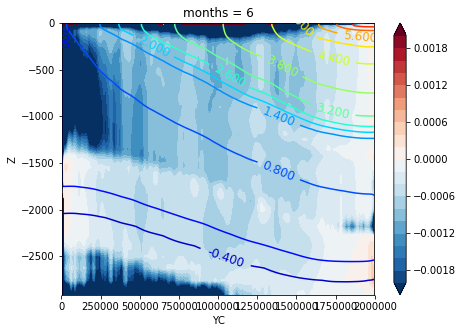

In [59]:
fig, ax = plt.subplots(figsize=(7,5))
srho[6].plot.contourf(ax=ax,levels=np.linspace(-2e-3,2e-3,21))
cs = temp_mon[6].plot.contour(ax=ax,levels=np.linspace(-1,8,16), cmap='jet')
plt.clabel(cs, inline=1, fontsize=12)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in subtract
  return func(*args2)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


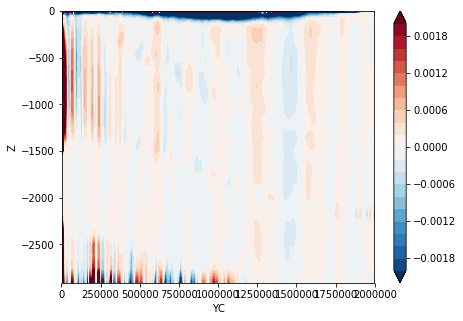

In [17]:
fig, ax = plt.subplots(figsize=(7,5))
(srho[4]-srho[1]).plot.contourf(ax=ax,levels=np.linspace(-2e-3,2e-3,21))

In [61]:
znew = np.linspace(np.abs(ds.Z[0]),np.abs(ds.Z[-1]),300)
f = pchip(np.abs(ds.Z), temp_mon, axis=1)
T_intp = xr.DataArray(f(znew), dims=['months','Z','YC'],
                      coords={'months':temp_mon.months.data, 'Z':-znew, 'YC':temp_mon.YC.data}
                     )
T_intp

<xarray.DataArray (months: 12, Z: 300, YC: 400)>
array([[[ 0.      ,  0.773203, ...,  7.941153,  7.958622],
        [ 0.      ,  0.77563 , ...,  7.244384,  7.23935 ],
        ...,
        [ 0.      , -0.537307, ..., -0.498633, -0.498033],
        [ 0.      , -0.53732 , ..., -0.499038, -0.498409]],

       [[ 0.      ,  0.777101, ...,  7.930031,  7.953258],
        [ 0.      ,  0.779524, ...,  7.272149,  7.266438],
        ...,
        [ 0.      , -0.537222, ..., -0.498695, -0.498077],
        [ 0.      , -0.537234, ..., -0.499099, -0.498452]],

       ...,

       [[ 0.      ,  0.763976, ...,  7.929963,  7.948208],
        [ 0.      ,  0.766441, ...,  7.195136,  7.201243],
        ...,
        [ 0.      , -0.536422, ..., -0.498735, -0.498431],
        [ 0.      , -0.536435, ..., -0.499135, -0.498804]],

       [[ 0.      ,  0.764438, ...,  7.940712,  7.956666],
        [ 0.      ,  0.766888, ...,  7.217378,  7.218314],
        ...,
        [ 0.      , -0.536347, ..., -0.498907, -0.4984

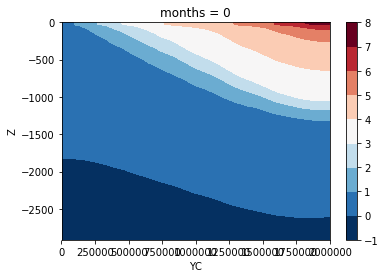

In [62]:
T_intp[0].plot.contourf(levels=np.linspace(-1,8,10))

In [74]:
slopes = np.zeros((12,10))
temps = np.linspace(1.,3.,10)
for i in range(12):
    k = 0
    for j in np.linspace(75,150,10):
        nz1 = np.argmin(np.abs(T_intp[i,:,int(j)].values-temps[k]))
        nz2 = np.argmin(np.abs(T_intp[i,:,int(j+75-k*7)].values-temps[k]))
        print(nz1, nz2)
        slopes[i,k] = (-znew[nz1]+znew[nz2])/(T_intp.YC[int(j)]-T_intp.YC[int(j+75-k*7)])
        k += 1

29 65
24 57
22 51
23 48
23 44
23 41
24 38
23 34
22 29
21 24
29 64
25 56
23 51
23 48
23 44
23 41
24 38
24 34
22 30
21 26
28 64
24 56
24 51
23 48
23 44
23 41
24 38
24 34
22 30
21 25
28 64
24 55
23 50
23 47
23 44
24 40
24 37
23 33
22 29
20 25
28 64
24 56
23 51
22 47
23 44
24 41
23 38
23 34
22 30
21 26
28 63
24 55
22 50
23 47
23 44
24 41
24 38
24 35
22 31
21 27
29 65
24 56
23 51
23 48
24 44
24 41
24 38
23 35
22 31
21 26
28 64
25 55
24 50
24 46
24 43
24 40
24 37
23 33
22 30
19 25
28 62
25 54
25 49
24 46
23 42
23 39
23 37
23 33
22 29
18 24
28 63
24 54
23 50
24 46
24 43
24 40
23 37
21 34
20 29
18 24
28 63
24 55
23 50
24 47
24 44
23 40
22 38
21 34
20 30
19 25
28 64
23 56
23 51
23 47
24 44
23 40
23 37
22 34
21 30
19 25


In [75]:
slopes_mon = slopes.mean(axis=1)
slopes_std = slopes.std(axis=1)
tau = 0.15 - 0.05*np.sin(np.pi/3.*np.arange(2,14))

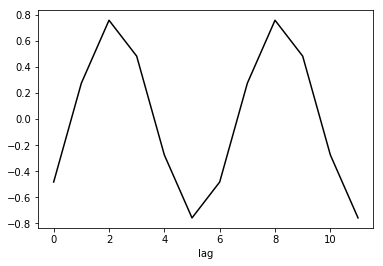

In [76]:
def crosscorr(data1, data2, lag=0):
    return np.corrcoef(data1, np.roll(data2, -lag))

xcoeff_monthly = xr.DataArray(np.asarray([crosscorr(tau, -slopes_mon, lag=i)[0,1] for i in range(12)]),
                             dims=['lag'], coords={'lag':range(12)})
xcoeff_monthly.plot(color='k')

In [77]:
xcoeff_monthly

<xarray.DataArray (lag: 12)>
array([-0.482638,  0.275087,  0.757725,  0.482638, -0.275087, -0.757725,
       -0.482638,  0.275087,  0.757725,  0.482638, -0.275087, -0.757725])
Coordinates:
  * lag      (lag) int64 0 1 2 3 4 5 6 7 8 9 10 11

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


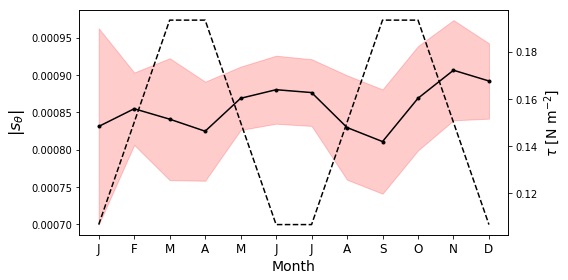

In [81]:
fig,ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
ax2 = ax.twinx()
ax.plot(range(1,13),-slopes_mon, 'k.-')
ax2.plot(range(1,13),tau, 'k--')
ax.fill_between(range(1,13), -slopes_mon-slopes_std, -slopes_mon+slopes_std, alpha=0.2, color='red')
ax.set_xticks(range(1,13))
ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'], fontsize=12)
ax.set_xlabel(r'Month', fontsize=14)
ax.set_ylabel(r'$|s_\theta|$', fontsize=16)
ax2.set_ylabel(r'$\tau$ [N m$^{-2}$]', fontsize=14)
# plt.ylim([-0.000845,-0.00084])
plt.savefig(op.join(ddir,'Figures/Isoslopes_tau_5km.pdf'))

In [176]:
ds.Ttave.mean(['time','XC']).to_dataset('theta').to_netcdf(op.join(ddir,'ZeroRes_temp_250-270yrs.nc'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the order of the arguments on DataArray.to_dataset has changed; you now need to supply ``name`` as a keyword argument
  """Entry point for launching an IPython kernel.
